In [ ]:
import pandas as pd

path = 'https://raw.githubusercontent.com/cleyson02/Time-Series/main/BeerWineLiquor.csv'

dados = pd.read_csv(path)

dados

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


<Axes: >

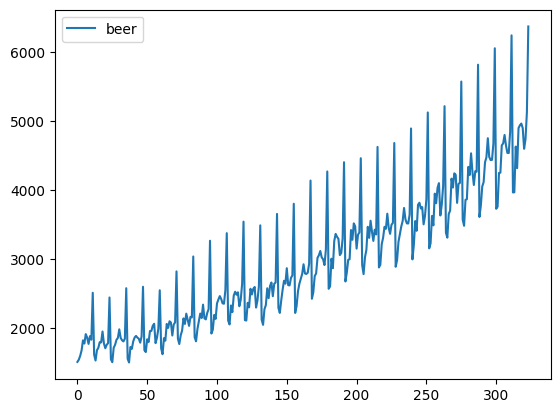

In [ ]:
dados.plot()

<Figure size 1200x600 with 0 Axes>

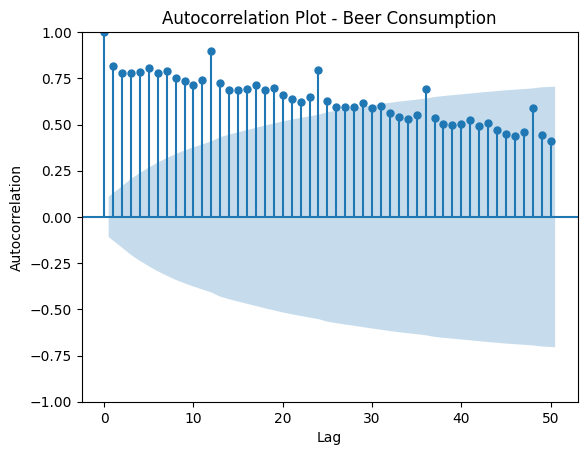

<Figure size 1200x600 with 0 Axes>

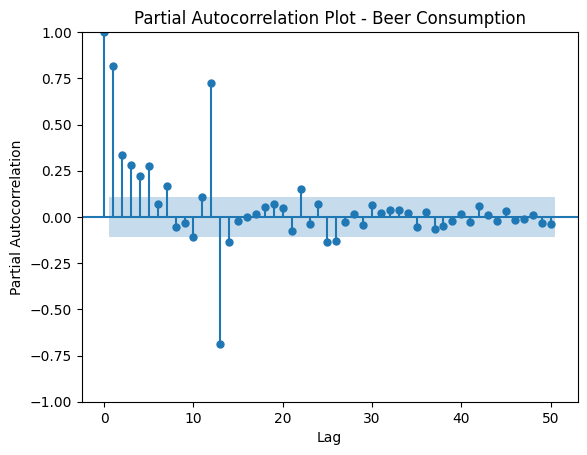

In [71]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotar o gráfico de autocorrelação
plt.figure(figsize=(12, 6))
plot_acf(dados['beer'], lags=50, title='Autocorrelation Plot - Beer Consumption')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plotar o gráfico de autocorrelação parcial
plt.figure(figsize=(12, 6))
plot_pacf(dados['beer'], lags=50, title='Partial Autocorrelation Plot - Beer Consumption')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [65]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Carregar os dados
path = 'https://raw.githubusercontent.com/cleyson02/Time-Series/main/BeerWineLiquor.csv'
dados = pd.read_csv(path)

# Converter a coluna 'date' para datetime e definir como índice
dados['date'] = pd.to_datetime(dados['date'])
dados.set_index('date', inplace=True)

# Normalizar os dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

# Converter os dados normalizados de volta para um DataFrame
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados.columns, index=dados.index)

# Definir o tamanho da janela deslizante
window_size = 12

# Dividir os dados em conjunto de treinamento e teste
train_size = int(0.8 * len(dados_normalizados))
train_data, test_data = dados_normalizados.iloc[:train_size], dados_normalizados.iloc[train_size:]

# Criar janelas deslizantes nos dados de treinamento
X_train = []
y_train = []
for i in range(len(train_data) - window_size):
    X_train.append(train_data.iloc[i:i+window_size].values.flatten())
    y_train.append(train_data.iloc[i+window_size])

# Treinar o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5) # Considera os cinco vizinhos mais próximos para calcular
knn.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
predictions = []
for i in range(len(test_data) - window_size):
    window = test_data.iloc[i:i+window_size].values.flatten()
    prediction = knn.predict([window])
    predictions.append(prediction[0])  # Flatten a lista de previsões

# Calcular o erro MSE
mse = mean_squared_error(test_data.iloc[window_size:], predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.034907833297751


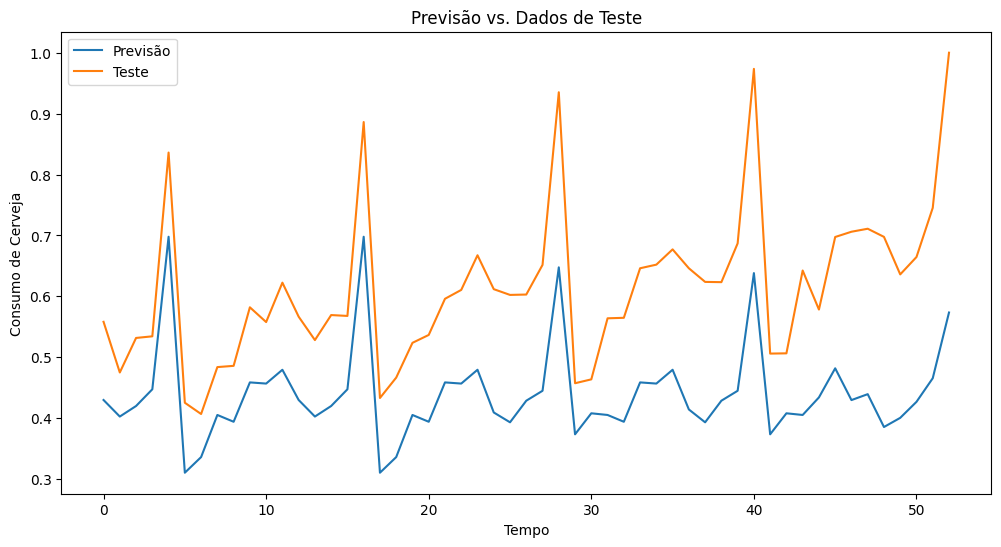

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Previsão')
plt.plot(test_data['beer'].iloc[window_size:].values, label='Teste')
plt.legend(loc='best')
plt.xlabel('Tempo')
plt.ylabel('Consumo de Cerveja')
plt.title('Previsão vs. Dados de Teste')
plt.show()

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Carregar os dados
path = 'https://raw.githubusercontent.com/cleyson02/Time-Series/main/BeerWineLiquor.csv'
dados = pd.read_csv(path)

# Converter a coluna 'date' para datetime e definir como índice
dados['date'] = pd.to_datetime(dados['date'])
dados.set_index('date', inplace=True)

# Normalizar os dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

# Converter os dados normalizados de volta para um DataFrame
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados.columns, index=dados.index)

# Definir o tamanho da janela deslizante
window_size = 12

# Dividir os dados em conjunto de treinamento e teste
train_size = int(0.8 * len(dados_normalizados))
train_data, test_data = dados_normalizados.iloc[:train_size], dados_normalizados.iloc[train_size:]

# Criar janelas deslizantes nos dados de treinamento
X_train = []
y_train = []
for i in range(len(train_data) - window_size):
    X_train.append(train_data.iloc[i:i+window_size].values.flatten())
    y_train.append(train_data.iloc[i+window_size])

# Treinar o modelo Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Fazer previsões utilizando o modelo treinado
predictions = []
for i in range(len(test_data) - window_size):
    window = test_data.iloc[i:i+window_size].values.flatten()
    prediction = tree_regressor.predict([window])
    predictions.append(prediction[0])  # Flatten a lista de previsões

# Calcular o erro MSE
mse = mean_squared_error(test_data.iloc[window_size:], predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.012850069241836194


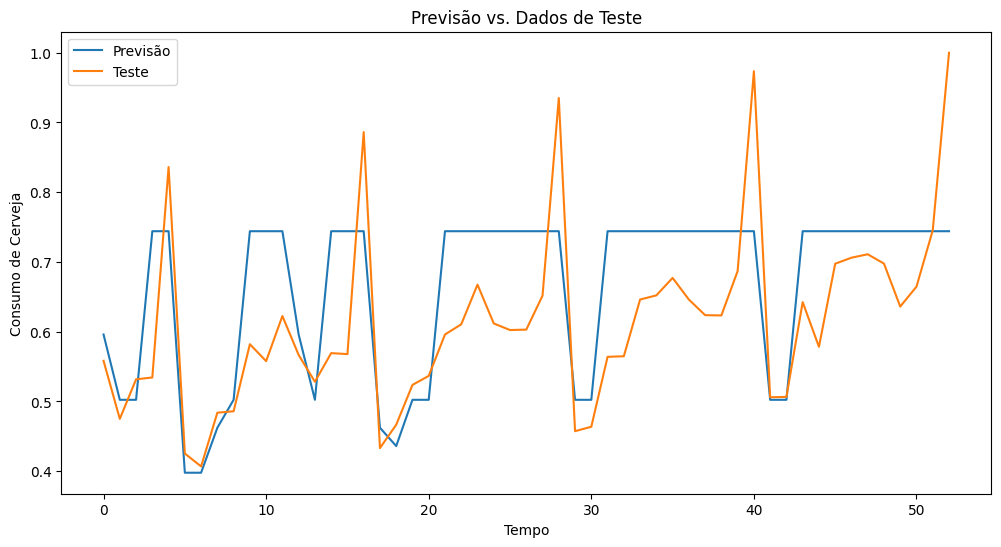

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Previsão')
plt.plot(test_data['beer'].iloc[window_size:].values, label='Teste')
plt.legend(loc='best')
plt.xlabel('Tempo')
plt.ylabel('Consumo de Cerveja')
plt.title('Previsão vs. Dados de Teste')
plt.show()